# Environment conda3--python3
## Coding UTF-8
### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import missingno as msno

# show library versions for documentation reference
import sys
print("Python: {}".format(sys.version))
print("pandas: {}".format(pd.__version__))
print("numpy: {}".format(np.__version__))
print("seaborn: {}".format(sns.__version__))
print("missingno: {}".format(msno.__version__))

Python: 3.7.7 (default, May  6 2020, 11:45:54) [MSC v.1916 64 bit (AMD64)]
pandas: 1.0.3
numpy: 1.18.1
seaborn: 0.10.1
missingno: 0.4.2


### Load House Dataset

In [2]:
df_house_new = pd.read_excel(r'C:\Users\OS\Desktop\Model Improvement Dataset\House-New Dataset 08-2020.xlsx')
df_house_current = pd.read_excel(r'C:\Users\OS\Desktop\Model Improvement Dataset\House-Current Dataset 08-2020.xlsx')

### Show Data --House_Dataset

In [3]:
# show example data from loaded file
df_house_new

,ID_Property,PropertyType,AnnounceTH,CodeDeed,SellPrice,Costestimate,CostestimateB,MarketPrice,BathRoom,BedRoom,...,Supermarket,CStore,MFee,Kitchen,LandAge,Created,PPStatus,ImageEX,Owner,UserType
0,h8803,บ้าน,บ้านมือสองหลังใหญ่สภาพใหม่มาก,,2990000,0,0,0,5.0,3.0,...,0,0,NaN,0,NaN,2020-07-23 00:00:00,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1595515...,79,Long-Term
1,h0029,บ้าน,MFU XZY,12345670,9000000,0,9200000,9120000,4.0,4.0,...,0,0,NaN,0,NaN,2020-06-04 00:00:00,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591254...,58,Long-Term
2,h0385,บ้าน,เต็มสิริ พรีว่า หนองจอก-ประชาสำราญ (บ้านแฝด Pr...,,2200000,0,1980000,0,2.0,3.0,...,0,0,NaN,0,,2020-08-25 12:46:12,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1598334...,79,Long-Term
3,h1047,บ้าน,เต็มสิริ พรีว่า หนองจอก-ประชาสำราญ (บ้านแฝด Pr...,,2300000,0,2070000,0,2.0,3.0,...,0,0,NaN,0,,2020-08-25 12:42:15,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1598334...,79,Long-Term
4,h7124,บ้าน,เต็มสิริ พรีว่า หนองจอก-ประชาสำราญ (ทาวน์โฮม P...,,1900000,0,1710000,0,2.0,3.0,...,0,0,NaN,0,,2020-08-25 12:38:38,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1598333...,79,Long-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,h4419,บ้าน,บ้าน เชียงใหม่,,3500000,0,4000000,4000000,2.0,3.0,...,0,0,NaN,0,,2020-06-08 16:33:04,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591608...,79,Long-Term
160,h4558,บ้าน,ขายที่บ้านชั้นเดี่ยวโซนบ้านดู่,155DV6XX48,1200000,0,1100000,1000000,3.0,3.0,...,0,0,NaN,0,,2020-06-08 01:44:36,ขายแล้ว,https://landvist.xyz/images/NewImg/img_1591555...,46,Long-Term
161,h9093,บ้าน,บ้านใกล้ห้าง,,1400000,2000000,2000000,2000000,2.0,3.0,...,0,0,NaN,0,,2020-06-04 14:15:31,,https://www.landvist.xyz/images/Defult/Defult.png,79,Short-Term
162,h6271,บ้าน,บ้าน honda,1234,1500000,1200000,1200000,1300000,2.0,3.0,...,0,0,NaN,0,3,2020-06-04 10:45:46,,https://www.landvist.xyz/images/Defult/Defult.png,79,Short-Term


In [4]:
df_house_current

,ID_Property,PropertyType,AnnounceTH,CodeDeed,SellPrice,Costestimate,CostestimateB,MarketPrice,BathRoom,BedRoom,...,Supermarket,CStore,MFee,Kitchen,LandAge,Created,PPStatus,ImageEX,Owner,UserType
0,h8803,บ้าน,บ้านมือสองหลังใหญ่สภาพใหม่มาก,,2990000,0,0,0,5.0,3.0,...,0,0,NaN,0,NaN,2020-07-23 21:47:34,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1595515...,79,Long-Term
1,h0029,บ้าน,MFU XZY,12345670,9000000,0,9200000,9120000,4.0,4.0,...,0,0,NaN,0,NaN,2020-06-04 14:12:45,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591254...,58,Long-Term
2,h4533,บ้าน,บ้านเดี่ยวสไตล์วินเทจ ตกแต่งสวยที่สุด แต่ถูกที...,773647678,8300000,0,8300000,8300000,3.0,4.0,...,0,0,NaN,0,NaN,2020-05-26 18:32:48,ยังไม่ขาย,https://landvist.xyz/images/img_1590683298748.jpg,58,Long-Term
3,h8497,บ้าน,ขายบ้านสวย บนเนินเขา วิวทะเล พร้อมสระว่ายน้ำ เ...,7686141,27000000,0,30000000,20000000,3.0,6.0,...,0,0,NaN,0,NaN,2020-05-07 23:55:21,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591376...,59,Long-Term
4,h1658,บ้าน,ขาย หมู่บ้านบางทอง กะทู้ ภูเก็ต ขนาด 102 ตรว. ...,7622705,6790000,0,5000000,6520000,2.0,3.0,...,0,0,NaN,0,NaN,2020-05-07 23:37:35,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591378...,59,Long-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,h7587,บ้าน,ขายบ้านพร้อมที่ดิน พร้อมสระส่วนตัว,56526,2000000,0,3000000,4000000,2.0,2.0,...,0,0,NaN,0,,1476-10-05 05:41:54,,https://landvist.xyz/images/Defult/Defult.png,48,Short-Term
406,p4777,อาคารพาณิชย์,ทาวน์เฮ้าส์กึ่งอาคารพาณิชย์ 2 ชั้น,35624,2000000,0,2100000,2300000,2.0,2.0,...,0,0,NaN,0,,1476-09-27 09:48:10,,https://landvist.xyz/images/img_1569593521949.jpg,39,Short-Term
407,p4682,อาคารพาณิชย์,ทรัพย์ บสส. รหัส 8Z6864 อาคารพาณิชย์,23354,2000000,0,1900000,2400000,4.0,3.0,...,0,0,0.0,0,,1476-09-27 09:33:31,,https://landvist.xyz/images/img_1569594407462.jpg,39,Short-Term
408,p6365,อาคารพาณิชย์,ขาย ตึกแถว อาคารพาณิชย์ 4 ชั้น ทำเลดี ย่านชุมช...,6373798,6900000,0,7000000,7000000,0.0,0.0,...,0,0,0.0,0,NaN,2019-10-07 16:37:11,,https://landvist.xyz/images/img_1570466286222.jpg,46,Short-Term


#### Visualisatuion assisting Analysis of Data

In [5]:
#frequency of labele in UserType from new Dataset
fr_new_df = df_house_new['UserType'].value_counts()
fr_new_df

Long-Term     158
Short-Term      6
Name: UserType, dtype: int64

In [6]:
#frequency of labele in UserType from old Dataset
fr_current_df = df_house_current['UserType'].value_counts()
fr_current_df

Long-Term     330
Short-Term     80
Name: UserType, dtype: int64

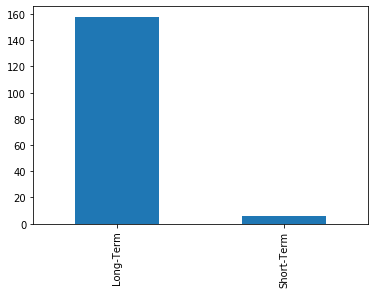

In [7]:
#plotting categorical variables for visualisation
fr_new_df.plot(kind='bar')

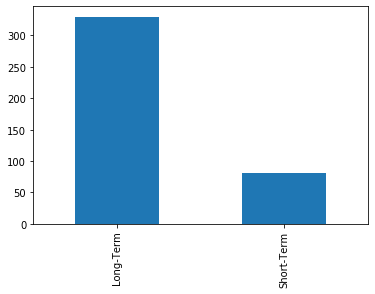

In [8]:
fr_current_df.plot(kind='bar')

'We need to know if the occurrence of missing values are sparsely located or located as a big chunk. This heatmap visualization immediately tells us such tendency. Also, if more than 2 columns have correlation in missing value locations, such correlation will be visualized.'

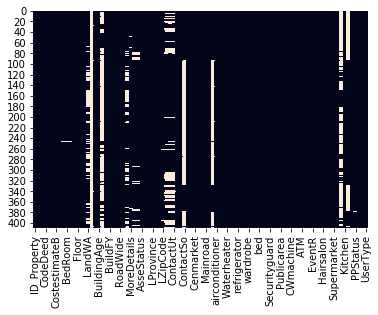

In [9]:
# Visualize the location of missing values.
sns.heatmap(df_house_current.isnull(), cbar=False)
"""We need to know if the occurrence of missing values are sparsely located or located as a big chunk. This heatmap visualization immediately tells us such tendency. Also, if more than 2 columns have correlation in missing value locations, such correlation will be visualized."""

"In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness.Also, missingno.heatmap visualizes the correlation matrix about the locations of missing values in columns."

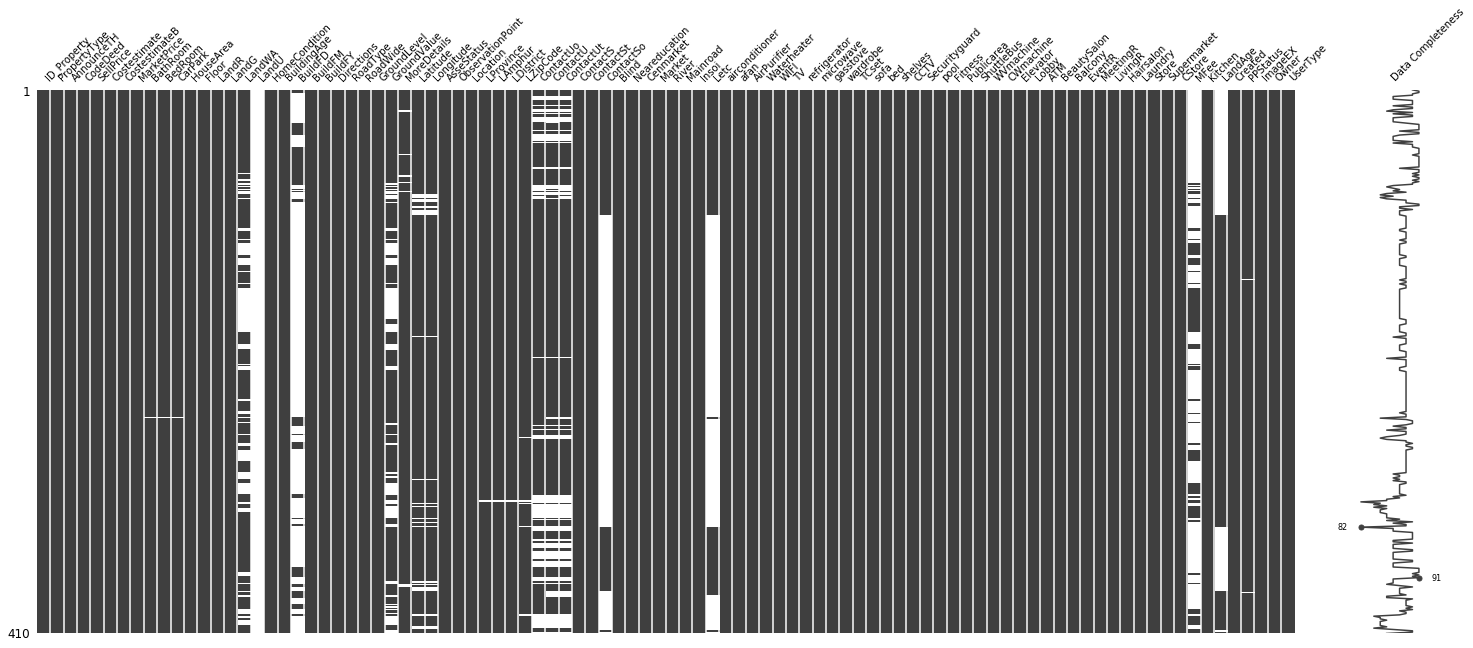

In [10]:
# Visualize missing values as a Matrix
msno.matrix(df_house_current, labels=True, fontsize=10)
"""In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness.Also, missingno.heatmap visualizes the correlation matrix about the locations of missing values in columns."""

'A simple representation of nullity by column'

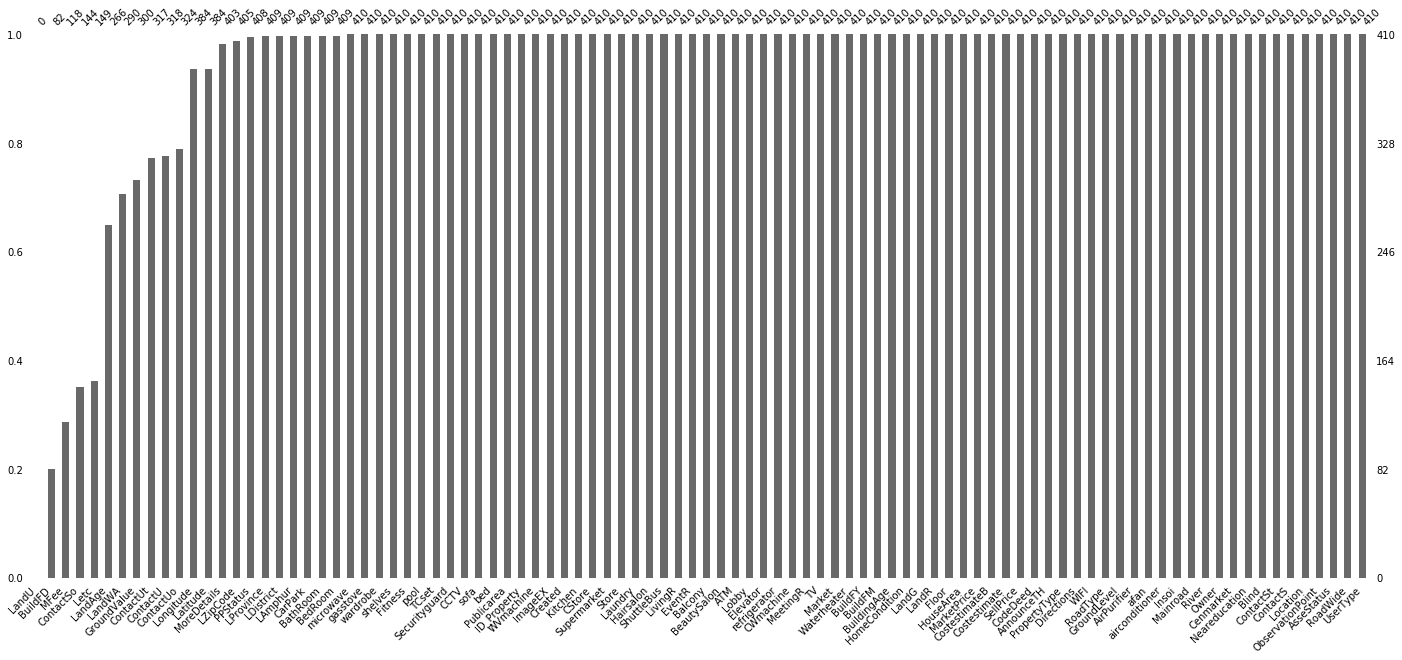

In [11]:
# Visualiz the missing values as a Bar Chart
msno.bar(df_house_current, labels=True, fontsize=10, sort="ascending")
"""A simple representation of nullity by column"""

'The bar chart of the number of missing values in each column and the dendrogram generated from the correlation of missing value locations. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another.'

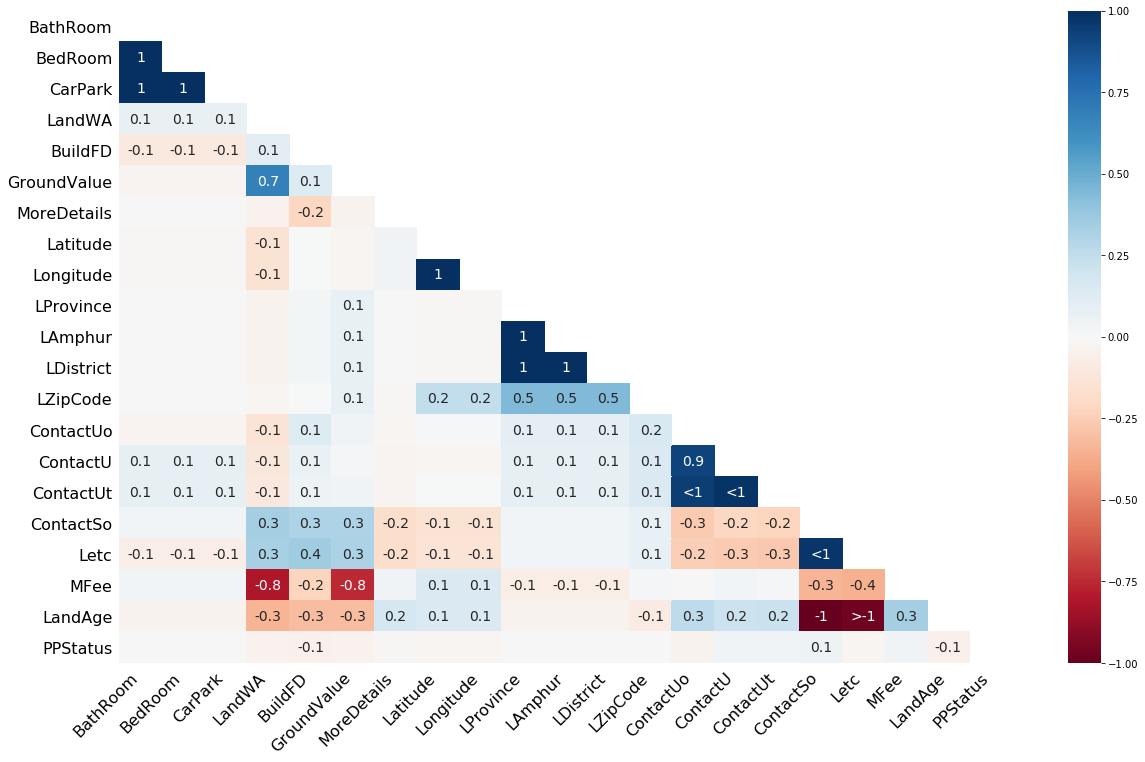

In [12]:
# Visualize the correlation between the number of missing values in different columns as a Heatmap
msno.heatmap(df_house_current)
"""The bar chart of the number of missing values in each column and the dendrogram generated from the correlation of missing value locations. The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another."""

In [13]:
# Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 
#(variables appearing or not appearing have no effect on one another) to 1 (if one variable appears 
#the other definitely also does).

# Entries marked <1 or >-1 have a correlation that is close to being exactingly negative or positive, 
#but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous. 
#For example, in this dataset the correlation between LandAge and Letc is >-1, indicating that, 
#contrary to our expectation, there are a few records which have one or the other, but not both. 
#These cases will require special attention.

# The heatmap works great for picking out data completeness relationships between variable pairs, 
#but its explanatory power is limited when it comes to larger relationships and it has no particular support
#for extremely large datasets.

#### Deal with missing Values

In [14]:
# Confirm the number of missing values in each column.
df_house_current.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Property       410 non-null    object 
 1   PropertyType      410 non-null    object 
 2   AnnounceTH        410 non-null    object 
 3   CodeDeed          410 non-null    object 
 4   SellPrice         410 non-null    int64  
 5   Costestimate      410 non-null    int64  
 6   CostestimateB     410 non-null    int64  
 7   MarketPrice       410 non-null    int64  
 8   BathRoom          409 non-null    float64
 9   BedRoom           409 non-null    float64
 10  CarPark           409 non-null    float64
 11  HouseArea         410 non-null    float64
 12  Floor             410 non-null    int64  
 13  LandR             410 non-null    object 
 14  LandG             410 non-null    object 
 15  LandWA            290 non-null    float64
 16  LandU             0 non-null      float64
 1

In [15]:
# Replace RoadType index that contain missing values wth NaN, in order to be able to change string to numeric
# In this case 1 row was replaced in RoadType column.
df_house_current = df_house_current.replace(np.nan).dropna(subset=['PPStatus'])
df_house_current

,ID_Property,PropertyType,AnnounceTH,CodeDeed,SellPrice,Costestimate,CostestimateB,MarketPrice,BathRoom,BedRoom,...,Supermarket,CStore,MFee,Kitchen,LandAge,Created,PPStatus,ImageEX,Owner,UserType
0,h8803,บ้าน,บ้านมือสองหลังใหญ่สภาพใหม่มาก,,2990000,0,0,0,5.0,3.0,...,0,0,NaN,0,NaN,2020-07-23 21:47:34,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1595515...,79,Long-Term
1,h0029,บ้าน,MFU XZY,12345670,9000000,0,9200000,9120000,4.0,4.0,...,0,0,NaN,0,NaN,2020-06-04 14:12:45,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591254...,58,Long-Term
2,h4533,บ้าน,บ้านเดี่ยวสไตล์วินเทจ ตกแต่งสวยที่สุด แต่ถูกที...,773647678,8300000,0,8300000,8300000,3.0,4.0,...,0,0,NaN,0,NaN,2020-05-26 18:32:48,ยังไม่ขาย,https://landvist.xyz/images/img_1590683298748.jpg,58,Long-Term
3,h8497,บ้าน,ขายบ้านสวย บนเนินเขา วิวทะเล พร้อมสระว่ายน้ำ เ...,7686141,27000000,0,30000000,20000000,3.0,6.0,...,0,0,NaN,0,NaN,2020-05-07 23:55:21,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591376...,59,Long-Term
4,h1658,บ้าน,ขาย หมู่บ้านบางทอง กะทู้ ภูเก็ต ขนาด 102 ตรว. ...,7622705,6790000,0,5000000,6520000,2.0,3.0,...,0,0,NaN,0,NaN,2020-05-07 23:37:35,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591378...,59,Long-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,h7587,บ้าน,ขายบ้านพร้อมที่ดิน พร้อมสระส่วนตัว,56526,2000000,0,3000000,4000000,2.0,2.0,...,0,0,5000.0,0,,1476-10-05 05:41:54,,https://landvist.xyz/images/Defult/Defult.png,48,Short-Term
406,p4777,อาคารพาณิชย์,ทาวน์เฮ้าส์กึ่งอาคารพาณิชย์ 2 ชั้น,35624,2000000,0,2100000,2300000,2.0,2.0,...,0,0,5000.0,0,,1476-09-27 09:48:10,,https://landvist.xyz/images/img_1569593521949.jpg,39,Short-Term
407,p4682,อาคารพาณิชย์,ทรัพย์ บสส. รหัส 8Z6864 อาคารพาณิชย์,23354,2000000,0,1900000,2400000,4.0,3.0,...,0,0,0.0,0,,1476-09-27 09:33:31,,https://landvist.xyz/images/img_1569594407462.jpg,39,Short-Term
408,p6365,อาคารพาณิชย์,ขาย ตึกแถว อาคารพาณิชย์ 4 ชั้น ทำเลดี ย่านชุมช...,6373798,6900000,0,7000000,7000000,0.0,0.0,...,0,0,0.0,0,,2019-10-07 16:37:11,,https://landvist.xyz/images/img_1570466286222.jpg,46,Short-Term


In [16]:
# Check if the missing values were replaced.
df_house_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 94 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID_Property       410 non-null    object 
 1   PropertyType      410 non-null    object 
 2   AnnounceTH        410 non-null    object 
 3   CodeDeed          410 non-null    object 
 4   SellPrice         410 non-null    int64  
 5   Costestimate      410 non-null    int64  
 6   CostestimateB     410 non-null    int64  
 7   MarketPrice       410 non-null    int64  
 8   BathRoom          410 non-null    float64
 9   BedRoom           410 non-null    float64
 10  CarPark           410 non-null    float64
 11  HouseArea         410 non-null    float64
 12  Floor             410 non-null    int64  
 13  LandR             410 non-null    object 
 14  LandG             410 non-null    object 
 15  LandWA            410 non-null    float64
 16  LandU             0 non-null      float64
 1

#### Change String to Numeric Values

In [17]:
from sklearn.preprocessing import LabelEncoder

# make a copy of the datframe
df_house_updated = df_house_current.copy(deep=True)

# encoding string values into numeric values
le_propTy = LabelEncoder()
le_asseSt = LabelEncoder()
le_userTy = LabelEncoder()
le_homeCon = LabelEncoder()
le_roadTy = LabelEncoder()

df_house_updated

,ID_Property,PropertyType,AnnounceTH,CodeDeed,SellPrice,Costestimate,CostestimateB,MarketPrice,BathRoom,BedRoom,...,Supermarket,CStore,MFee,Kitchen,LandAge,Created,PPStatus,ImageEX,Owner,UserType
0,h8803,บ้าน,บ้านมือสองหลังใหญ่สภาพใหม่มาก,,2990000,0,0,0,5.0,3.0,...,0,0,NaN,0,NaN,2020-07-23 21:47:34,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1595515...,79,Long-Term
1,h0029,บ้าน,MFU XZY,12345670,9000000,0,9200000,9120000,4.0,4.0,...,0,0,NaN,0,NaN,2020-06-04 14:12:45,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591254...,58,Long-Term
2,h4533,บ้าน,บ้านเดี่ยวสไตล์วินเทจ ตกแต่งสวยที่สุด แต่ถูกที...,773647678,8300000,0,8300000,8300000,3.0,4.0,...,0,0,NaN,0,NaN,2020-05-26 18:32:48,ยังไม่ขาย,https://landvist.xyz/images/img_1590683298748.jpg,58,Long-Term
3,h8497,บ้าน,ขายบ้านสวย บนเนินเขา วิวทะเล พร้อมสระว่ายน้ำ เ...,7686141,27000000,0,30000000,20000000,3.0,6.0,...,0,0,NaN,0,NaN,2020-05-07 23:55:21,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591376...,59,Long-Term
4,h1658,บ้าน,ขาย หมู่บ้านบางทอง กะทู้ ภูเก็ต ขนาด 102 ตรว. ...,7622705,6790000,0,5000000,6520000,2.0,3.0,...,0,0,NaN,0,NaN,2020-05-07 23:37:35,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591378...,59,Long-Term
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,h7587,บ้าน,ขายบ้านพร้อมที่ดิน พร้อมสระส่วนตัว,56526,2000000,0,3000000,4000000,2.0,2.0,...,0,0,5000.0,0,,1476-10-05 05:41:54,,https://landvist.xyz/images/Defult/Defult.png,48,Short-Term
406,p4777,อาคารพาณิชย์,ทาวน์เฮ้าส์กึ่งอาคารพาณิชย์ 2 ชั้น,35624,2000000,0,2100000,2300000,2.0,2.0,...,0,0,5000.0,0,,1476-09-27 09:48:10,,https://landvist.xyz/images/img_1569593521949.jpg,39,Short-Term
407,p4682,อาคารพาณิชย์,ทรัพย์ บสส. รหัส 8Z6864 อาคารพาณิชย์,23354,2000000,0,1900000,2400000,4.0,3.0,...,0,0,0.0,0,,1476-09-27 09:33:31,,https://landvist.xyz/images/img_1569594407462.jpg,39,Short-Term
408,p6365,อาคารพาณิชย์,ขาย ตึกแถว อาคารพาณิชย์ 4 ชั้น ทำเลดี ย่านชุมช...,6373798,6900000,0,7000000,7000000,0.0,0.0,...,0,0,0.0,0,,2019-10-07 16:37:11,,https://landvist.xyz/images/img_1570466286222.jpg,46,Short-Term


In [18]:
# create new columns containing numeric code of former column
df_house_current['PropertyType_n'] = le_propTy.fit_transform(df_house_current['PropertyType'])
df_house_current['AsseStatus_n'] = le_asseSt.fit_transform(df_house_current['AsseStatus'])
df_house_current['UserType_n'] = le_userTy.fit_transform(df_house_current['UserType'])
df_house_current['HomeCondition_n'] = le_homeCon.fit_transform(df_house_current['HomeCondition'])
df_house_current['RoadType_n'] = le_roadTy.fit_transform(df_house_current['RoadType'])
df_house_current

,ID_Property,PropertyType,AnnounceTH,CodeDeed,SellPrice,Costestimate,CostestimateB,MarketPrice,BathRoom,BedRoom,...,Created,PPStatus,ImageEX,Owner,UserType,PropertyType_n,AsseStatus_n,UserType_n,HomeCondition_n,RoadType_n
0,h8803,บ้าน,บ้านมือสองหลังใหญ่สภาพใหม่มาก,,2990000,0,0,0,5.0,3.0,...,2020-07-23 21:47:34,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1595515...,79,Long-Term,1,2,0,2,1
1,h0029,บ้าน,MFU XZY,12345670,9000000,0,9200000,9120000,4.0,4.0,...,2020-06-04 14:12:45,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591254...,58,Long-Term,1,0,0,3,1
2,h4533,บ้าน,บ้านเดี่ยวสไตล์วินเทจ ตกแต่งสวยที่สุด แต่ถูกที...,773647678,8300000,0,8300000,8300000,3.0,4.0,...,2020-05-26 18:32:48,ยังไม่ขาย,https://landvist.xyz/images/img_1590683298748.jpg,58,Long-Term,1,0,0,2,3
3,h8497,บ้าน,ขายบ้านสวย บนเนินเขา วิวทะเล พร้อมสระว่ายน้ำ เ...,7686141,27000000,0,30000000,20000000,3.0,6.0,...,2020-05-07 23:55:21,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591376...,59,Long-Term,1,2,0,2,1
4,h1658,บ้าน,ขาย หมู่บ้านบางทอง กะทู้ ภูเก็ต ขนาด 102 ตรว. ...,7622705,6790000,0,5000000,6520000,2.0,3.0,...,2020-05-07 23:37:35,ยังไม่ขาย,https://landvist.xyz/images/NewImg/img_1591378...,59,Long-Term,1,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,h7587,บ้าน,ขายบ้านพร้อมที่ดิน พร้อมสระส่วนตัว,56526,2000000,0,3000000,4000000,2.0,2.0,...,1476-10-05 05:41:54,,https://landvist.xyz/images/Defult/Defult.png,48,Short-Term,1,0,1,2,2
406,p4777,อาคารพาณิชย์,ทาวน์เฮ้าส์กึ่งอาคารพาณิชย์ 2 ชั้น,35624,2000000,0,2100000,2300000,2.0,2.0,...,1476-09-27 09:48:10,,https://landvist.xyz/images/img_1569593521949.jpg,39,Short-Term,2,3,1,3,1
407,p4682,อาคารพาณิชย์,ทรัพย์ บสส. รหัส 8Z6864 อาคารพาณิชย์,23354,2000000,0,1900000,2400000,4.0,3.0,...,1476-09-27 09:33:31,,https://landvist.xyz/images/img_1569594407462.jpg,39,Short-Term,2,0,1,2,1
408,p6365,อาคารพาณิชย์,ขาย ตึกแถว อาคารพาณิชย์ 4 ชั้น ทำเลดี ย่านชุมช...,6373798,6900000,0,7000000,7000000,0.0,0.0,...,2019-10-07 16:37:11,,https://landvist.xyz/images/img_1570466286222.jpg,46,Short-Term,2,3,1,2,0


In [19]:
df_house_select = df_house_current[['PropertyType_n', 'SellPrice', 'CostestimateB','MarketPrice', 
                                   'HouseArea', 'Floor', 'HomeCondition_n', 'BuildingAge','RoadType_n',
                                   'AsseStatus_n', 'UserType_n']]
df_house_select

,PropertyType_n,SellPrice,CostestimateB,MarketPrice,HouseArea,Floor,HomeCondition_n,BuildingAge,RoadType_n,AsseStatus_n,UserType_n
0,1,2990000,0,0,140.0,1,2,1,1,2,0
1,1,9000000,9200000,9120000,230.0,3,3,13,1,0,0
2,1,8300000,8300000,8300000,256.0,2,2,6,3,0,0
3,1,27000000,30000000,20000000,1600.0,3,2,20,1,2,0
4,1,6790000,5000000,6520000,250.0,1,3,5,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
405,1,2000000,3000000,4000000,129.0,1,2,11,2,0,1
406,2,2000000,2100000,2300000,240.0,2,3,7,1,3,1
407,2,2000000,1900000,2400000,76.8,4,2,13,1,0,1
408,2,6900000,7000000,7000000,56.0,3,2,16,0,3,1


#### Export Cleaned Dataset

In [20]:
# model training dataset as text and csv
df_house_select.to_csv(r'C:\Users\OS\Desktop\Model Improvement Dataset\df_cleaned_house_model_001-09-2020.txt', index=False)
df_house_select.to_csv(r'C:\Users\OS\Desktop\Model Improvement Dataset\df_cleaned_house_model_001-09-2020.csv', index=False)

# entire dataset as text (encoding error with csv)
df_house_updated.to_csv(r'C:\Users\OS\Desktop\Model Improvement Dataset\df_cleaned_house_001-09-2020.txt', index=False)